In [312]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.neighbors import NearestNeighbors

import warnings
warnings.filterwarnings('ignore')

In [313]:
data = pd.read_csv('new hcv data.csv').drop('Category', axis=1)
data

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.500000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.300000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.700000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.000000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.100000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,0,32.0,416.600000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,64,0,24.0,102.800000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,64,0,29.0,87.300000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,46,0,33.0,76.287690,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [314]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     615 non-null    int64  
 1   Sex     615 non-null    int64  
 2   ALB     615 non-null    float64
 3   ALP     615 non-null    float64
 4   ALT     615 non-null    float64
 5   AST     615 non-null    float64
 6   BIL     615 non-null    float64
 7   CHE     615 non-null    float64
 8   CHOL    615 non-null    float64
 9   CREA    615 non-null    float64
 10  GGT     615 non-null    float64
 11  PROT    615 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 57.8 KB


In [315]:
data.shape

(615, 12)

In [316]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,615.0,47.408130,10.055105,19.00,39.000,47.00,54.000,77.00
Sex,615.0,0.613008,0.487458,0.00,0.000,1.00,1.000,1.00
ALB,615.0,41.626770,5.778221,14.90,38.800,42.00,45.250,82.20
ALP,615.0,68.833129,25.976751,11.30,52.950,66.50,81.000,416.60
ALT,615.0,28.441029,25.450097,0.90,16.400,23.00,33.050,325.30
AST,615.0,34.786341,33.090690,10.60,21.600,25.90,32.900,324.00
BIL,615.0,11.396748,19.673150,0.80,5.300,7.30,11.200,254.00
CHE,615.0,8.196634,2.205657,1.42,6.935,8.26,9.590,16.41
CHOL,615.0,5.370115,1.124331,1.43,4.620,5.30,6.055,9.67
CREA,615.0,81.287805,49.756166,8.00,67.000,77.00,88.000,1079.10


<Axes: >

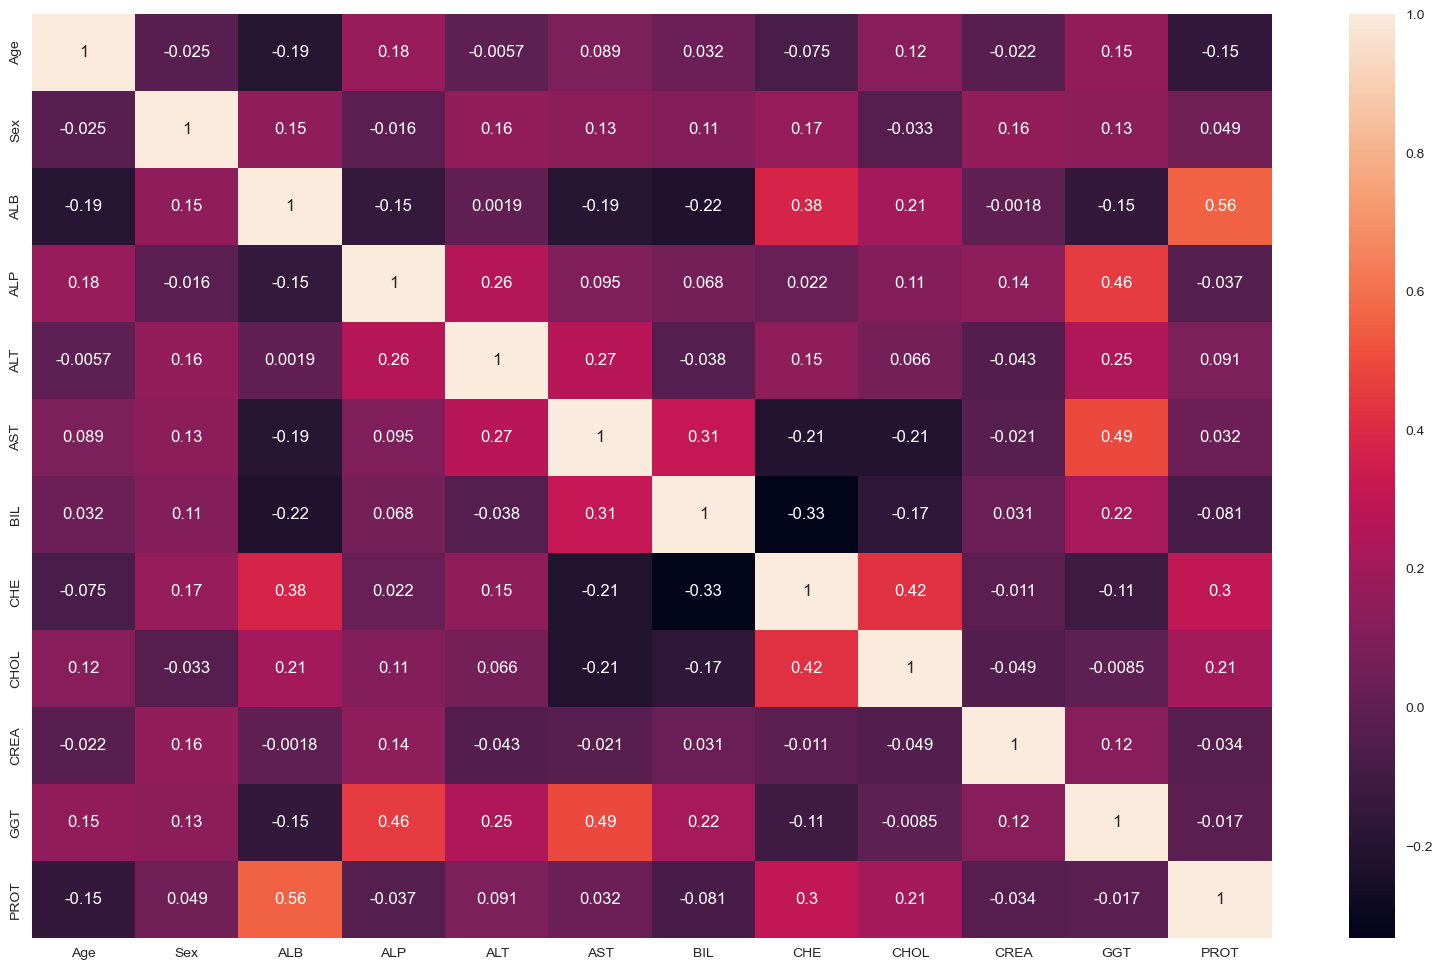

In [317]:
plt.figure(figsize=(20, 12))
sns.heatmap(data.corr(), annot=True)

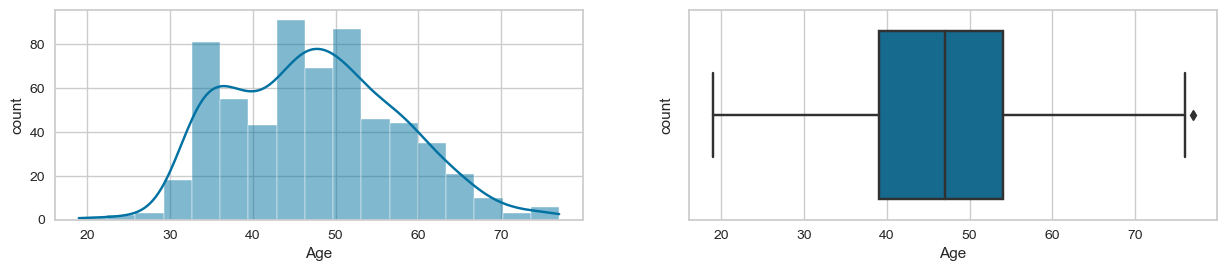

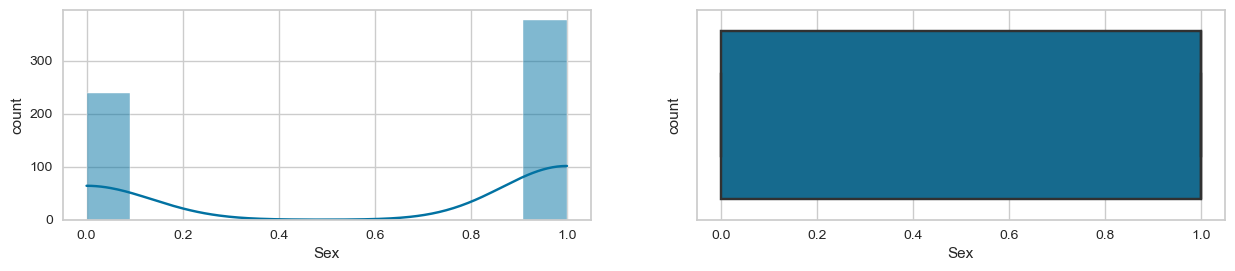

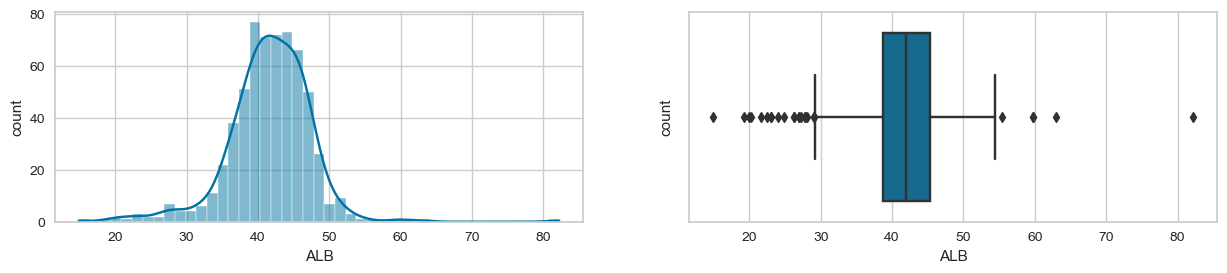

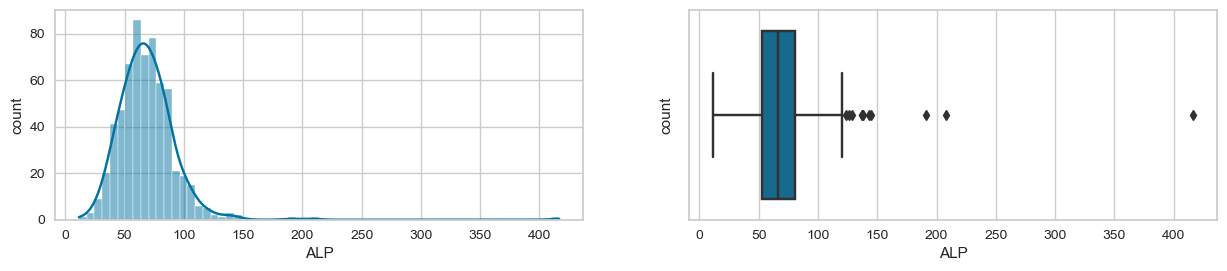

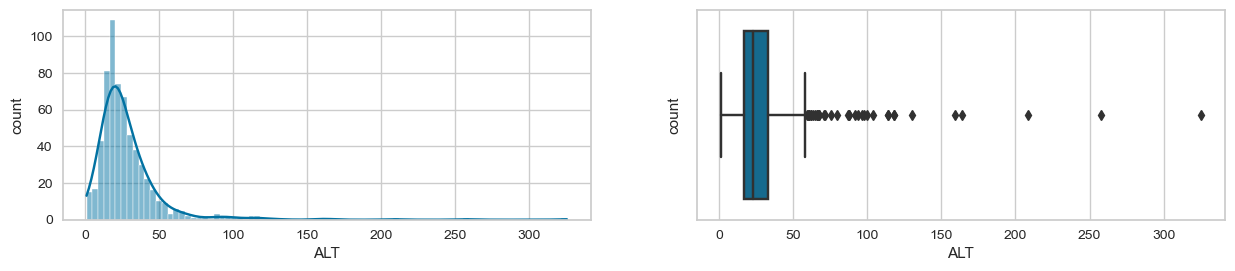

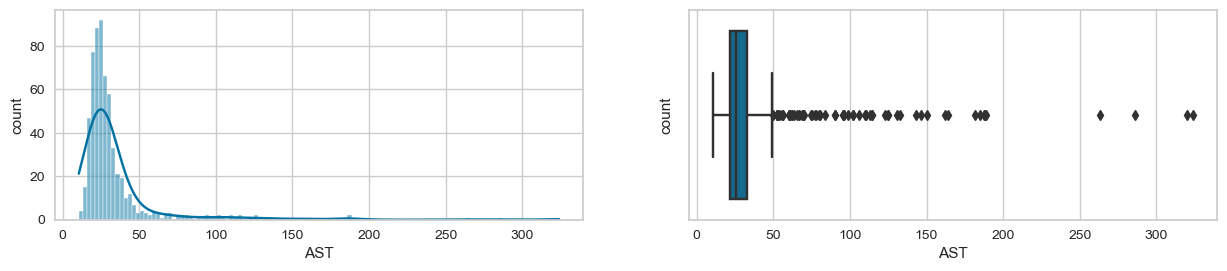

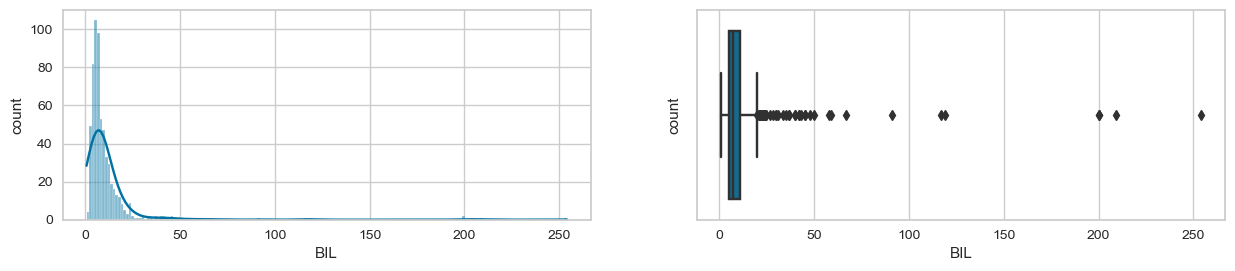

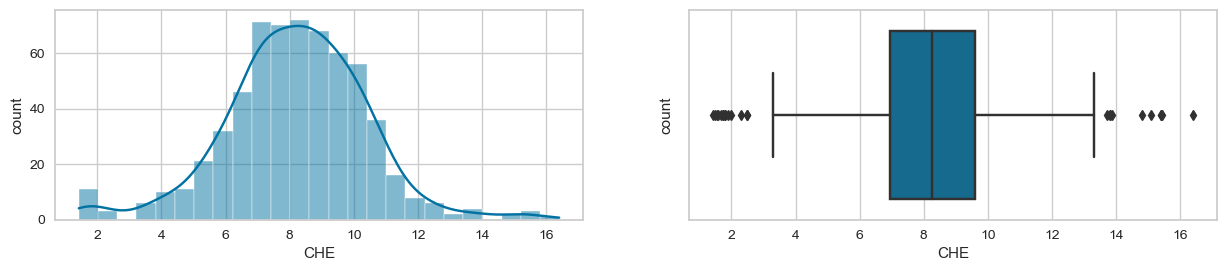

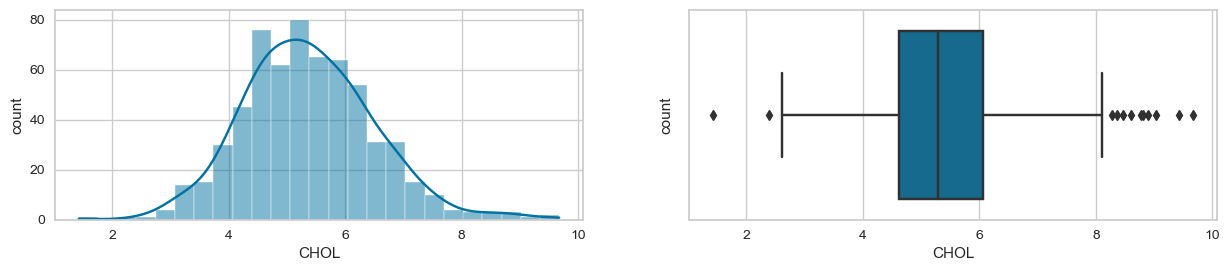

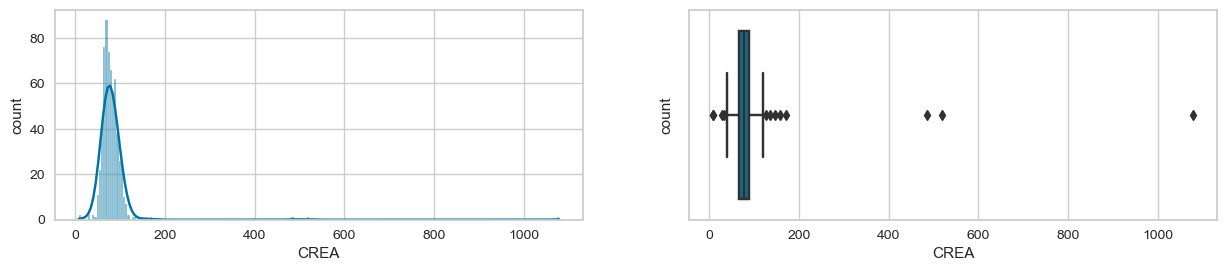

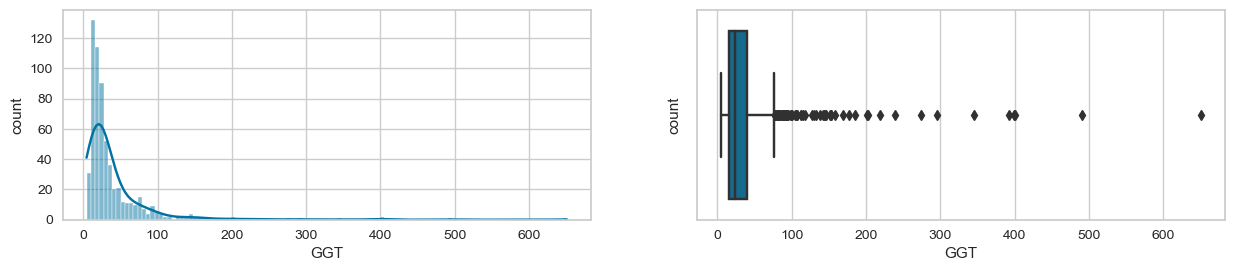

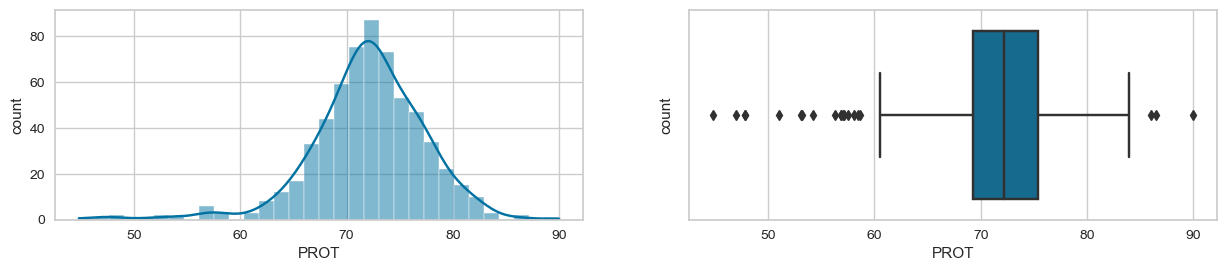

In [318]:
features = data.columns.tolist()

for feature in features:
    plt.figure(figsize=(15, 6))
    plt.subplot(2, 2, 1)
    sns.histplot(data, x=feature, kde=True)
    plt.xlabel(feature)
    plt.ylabel('count')

    plt.subplot(2, 2, 2)
    sns.boxplot(data=data, x=feature)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

In [319]:
c = data.corr().abs()
s = c.unstack()
so = s.sort_values(ascending=False)
so = so[(so<1) & (so>0.25)].drop_duplicates().to_frame()
so.columns = ['correlation']
so

correlation
PROT ALB      0.561510
GGT  AST      0.491263
     ALP      0.457083
CHE  CHOL     0.424130
     ALB      0.375338
     BIL      0.333172
BIL  AST      0.312231
CHE  PROT     0.301992
ALT  AST      0.273332
     ALP      0.263510

<Axes: xlabel='Sex', ylabel='CREA'>

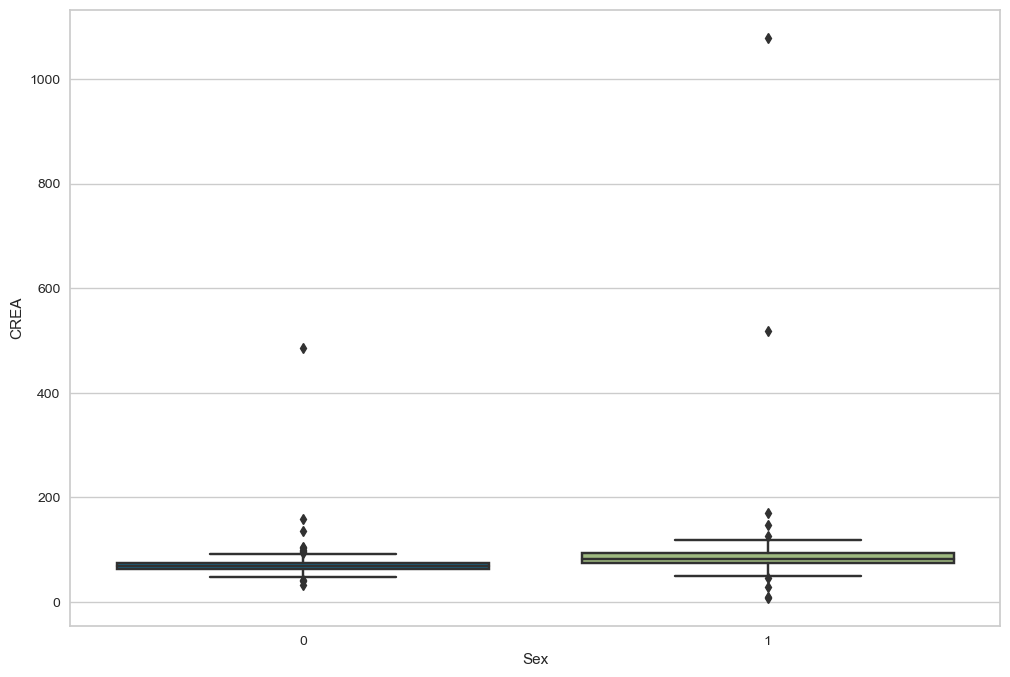

In [320]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Sex', y='CREA')

<Axes: xlabel='Sex', ylabel='ALT'>

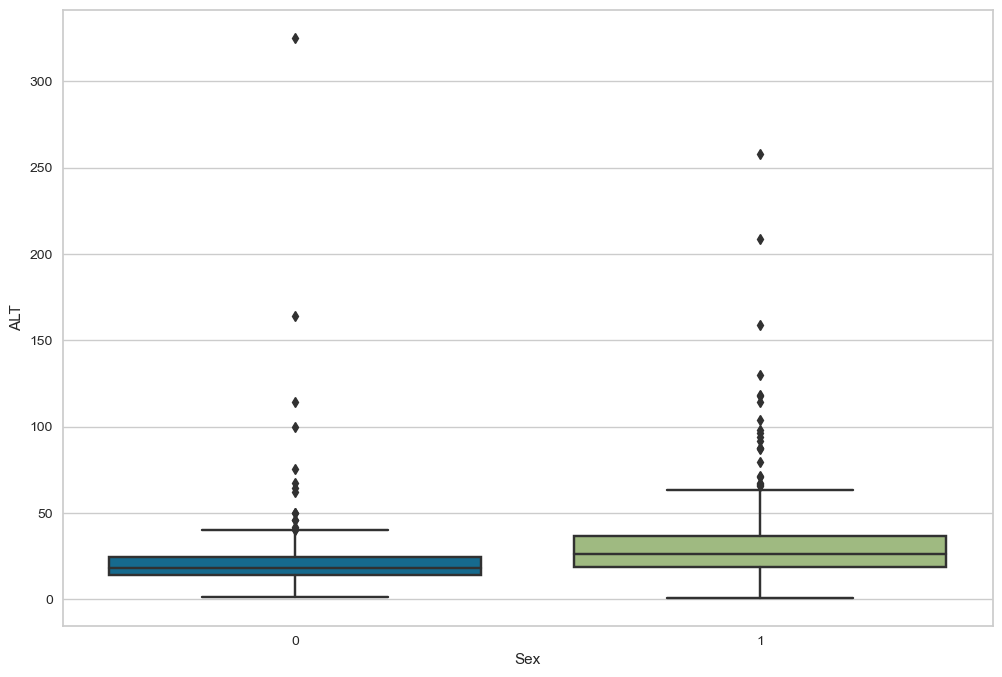

In [321]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Sex', y='ALT')

<Axes: xlabel='Sex', ylabel='AST'>

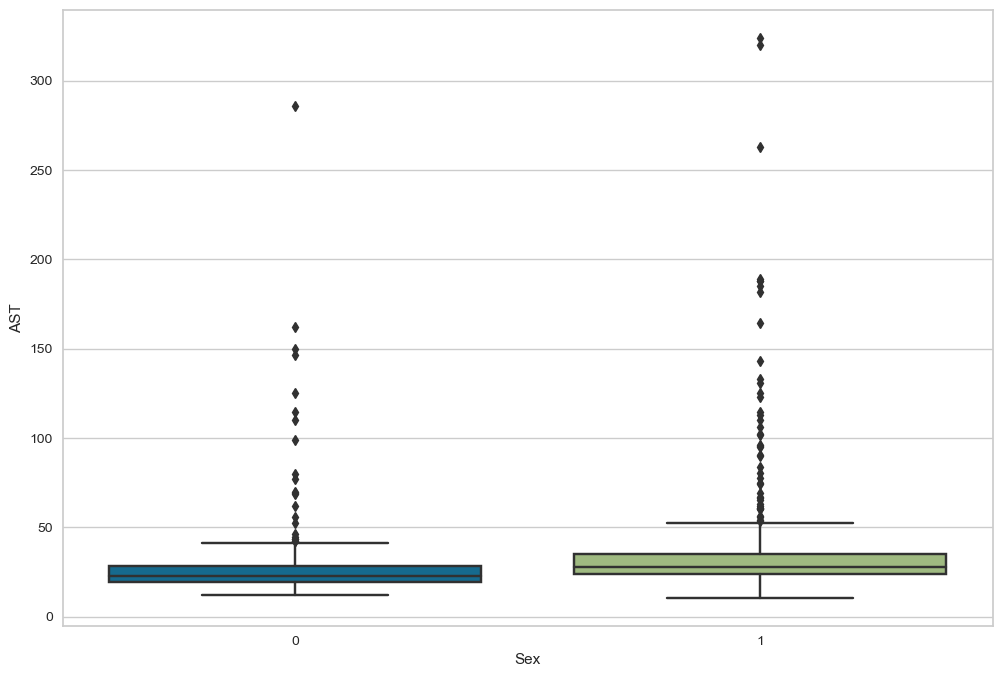

In [322]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Sex', y='AST')

<Axes: xlabel='PROT', ylabel='ALB'>

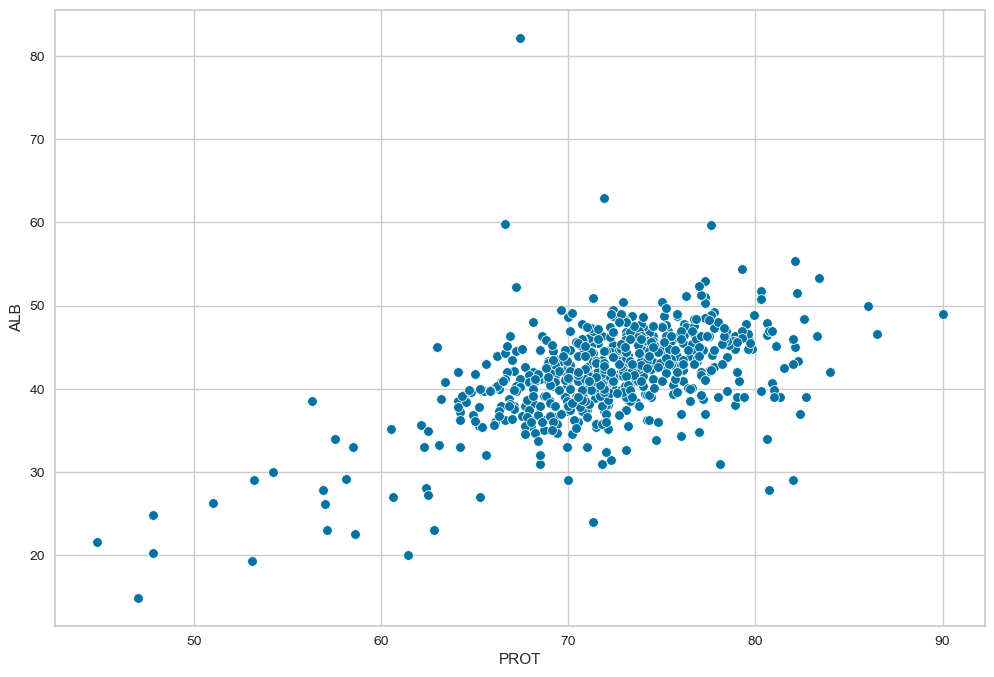

In [323]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='PROT', y='ALB')

<Axes: xlabel='AST', ylabel='ALT'>

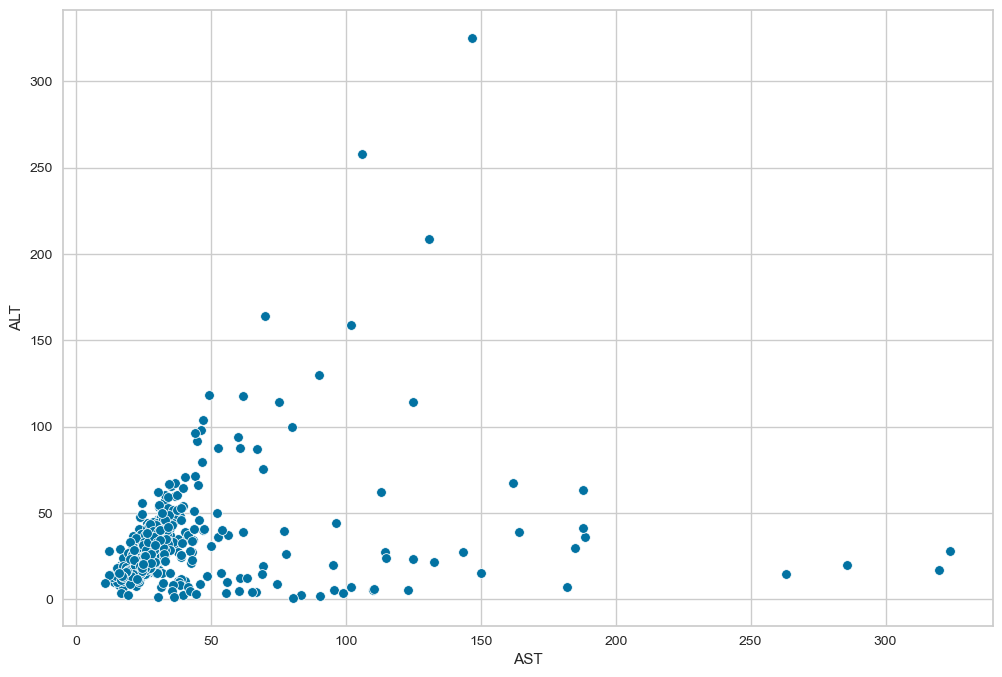

In [324]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='AST', y='ALT')

<Axes: xlabel='CHE', ylabel='CHOL'>

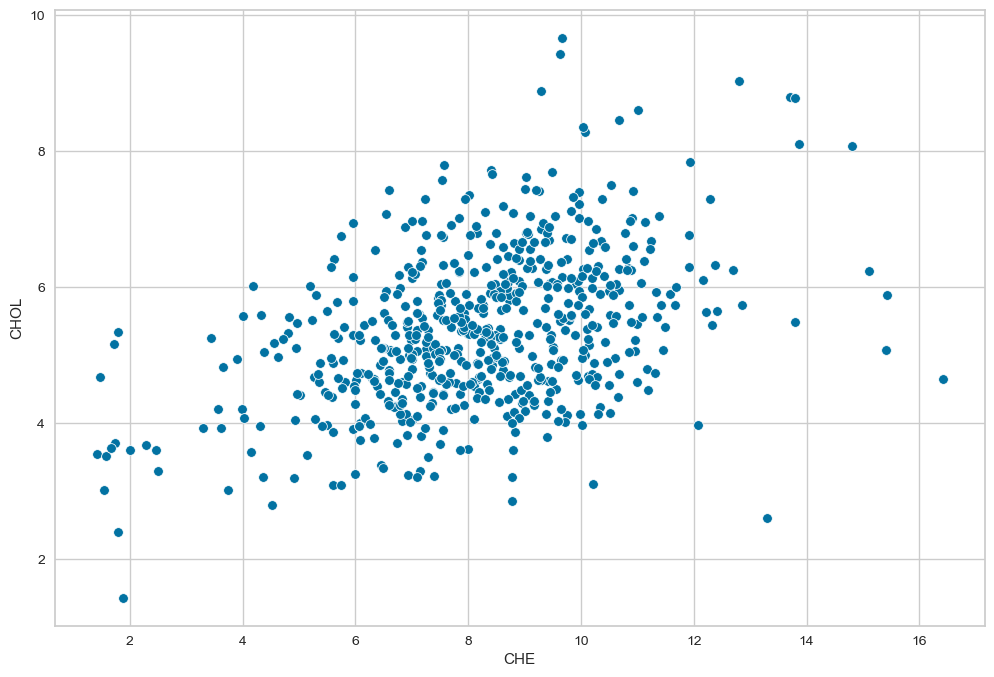

In [325]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='CHE', y='CHOL')

<Axes: xlabel='CREA', ylabel='ALT'>

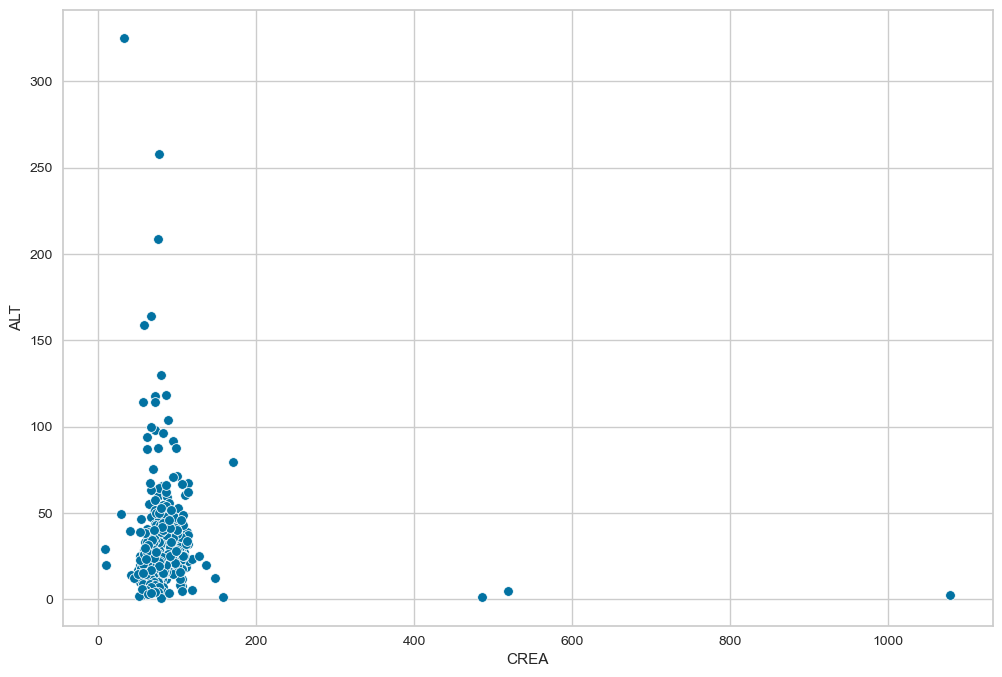

In [326]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='CREA', y='ALT')

<Axes: xlabel='ALT', ylabel='CHE'>

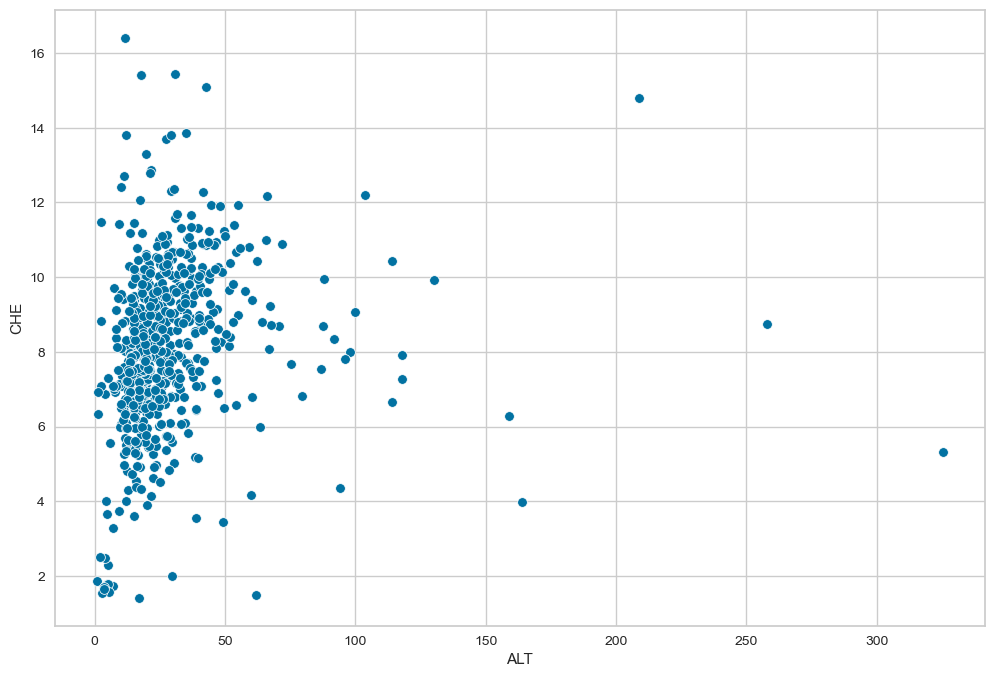

In [327]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='ALT', y='CHE')

<Axes: xlabel='PROT', ylabel='ALB'>

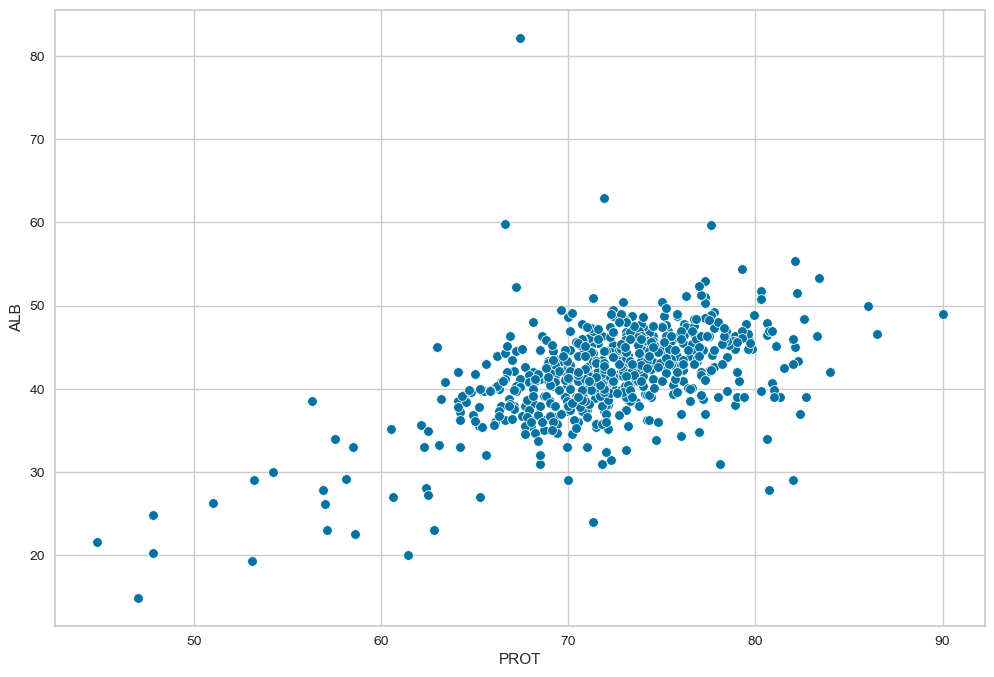

In [328]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='PROT', y='ALB')

**Menggunakan PCA untuk mengetahui fitur terpenting yang dapat digunakan untuk clustering**

In [329]:
data = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns)

In [330]:
pca = PCA(n_components=None)
data_pca = pca.fit(data)

In [331]:
features = data.columns
most_important = [np.abs(data_pca.components_[i]).argmax() for i in range (data_pca.components_.shape[0])]
most_important_names = [features[most_important[i]] for i in range(data_pca.components_.shape[0])]
variances = data_pca.explained_variance_ratio_.tolist()

df_importance = pd.DataFrame({'PC': range(1, len(most_important_names)+1), 'Features': most_important_names, 'Variance': variances})
df_importance

,PC,Features,Variance
0,1,ALB,0.208335
1,2,ALT,0.161627
2,3,Age,0.116141
3,4,CREA,0.094281
4,5,ALT,0.079936
5,6,Sex,0.077761
6,7,BIL,0.062346
7,8,ALP,0.051674
8,9,ALT,0.050000
9,10,CHE,0.038920


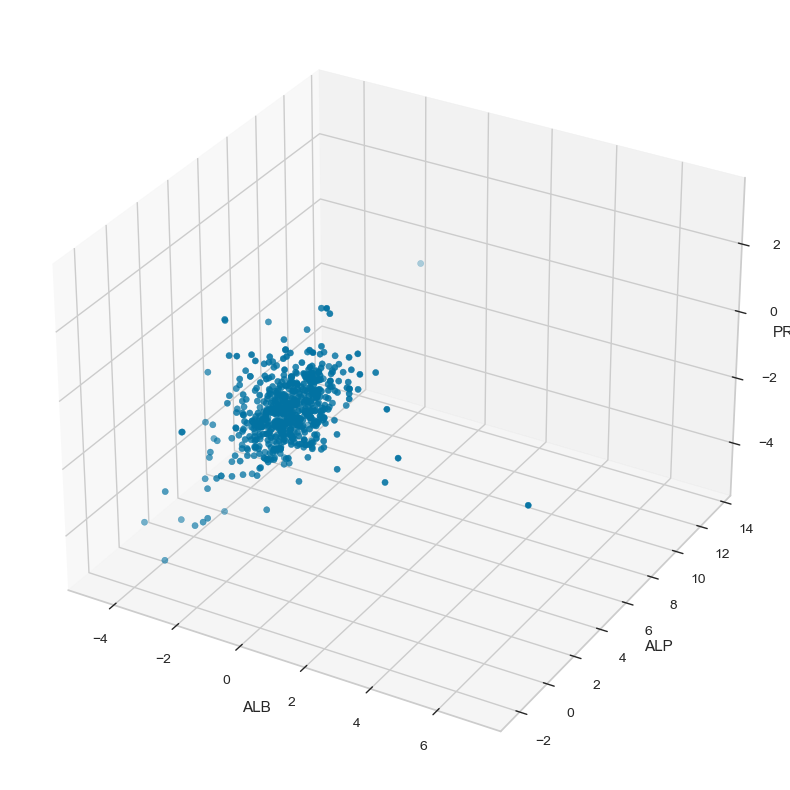

In [332]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

x = data['ALB']
y = data['ALP']
z = data['PROT']

ax.scatter(x, y, z)

ax.set_xlabel('ALB')
ax.set_ylabel('ALP')
ax.set_zlabel('PROT')

plt.show()

*Berdasarkan hasil PCA diatas, ALT dan CHOL memiliki nilai variance yang tinggi, artinya dalam dua kolom tersebut, ada sejumlah besar informasi, sehingga kedua kolom tersebut dapat digunakan untuk model prediktif atau deskriptif untuk HCV ini.*

**Model dengan algoritma elbow**

In [333]:
df = data.copy()
df

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,-1.533616,0.794544,-0.541571,-0.629271,-0.815632,-0.383693,-0.198236,-0.574734,-1.905006,0.497070,-0.502286,-0.559414
1,-1.533616,0.794544,-0.541571,0.056515,-0.410589,-0.305057,-0.381375,1.349161,-0.507483,-0.146590,-0.438203,0.826706
2,-1.533616,0.794544,0.913347,0.226035,0.305118,0.538767,-0.269457,0.291926,-0.151426,0.094783,-0.115957,1.344191
3,-1.533616,0.794544,0.272491,-0.648535,0.084901,-0.368571,0.381706,-0.393234,-0.560892,-0.025903,-0.104971,0.678853
4,-1.533616,0.794544,-0.420328,0.202918,0.163550,-0.302033,-0.091404,0.432588,-0.934751,-0.106361,-0.176378,-0.614859
...,...,...,...,...,...,...,...,...,...,...,...,...
610,1.452371,-1.258584,-1.667400,13.398518,-0.886416,2.283879,1.963828,-1.191832,0.827730,-0.514683,11.193789,-0.651822
611,1.651437,-1.258584,-3.053036,1.308652,-1.004390,0.290761,0.437665,-3.020439,-2.091936,-0.367848,-0.066521,-0.134337
612,1.651437,-1.258584,-2.187014,0.711479,-0.980795,1.942115,1.862083,-2.965989,-1.548949,-0.293425,0.451636,1.843194
613,-0.140155,-1.258584,-1.494196,0.287204,0.415227,0.823066,0.437665,-2.103866,-1.041568,-0.589106,0.191642,-0.189782


In [334]:
km_data = df.copy()

In [335]:
wcss = []

for n in range (1, 11):
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=100, random_state=42)
    kmeans.fit(km_data)
    wcss.append(kmeans.inertia_)

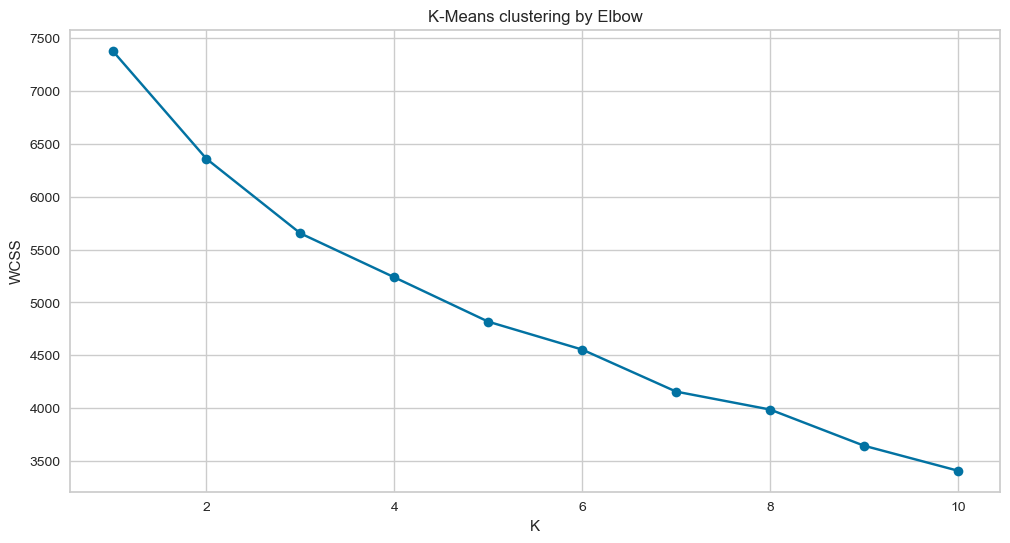

In [336]:
plt.figure(figsize=(12,6))
plt.plot(range(1, 11), wcss, 'o-')
plt.title('K-Means clustering by Elbow')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [337]:
for i in range (1, len(wcss)):
    print(f'cluster {i} -> {wcss[i]}')

cluster 1 -> 6357.636816596111
cluster 2 -> 5652.793208896551
cluster 3 -> 5237.082208968603
cluster 4 -> 4817.670704570977
cluster 5 -> 4553.64920114734
cluster 6 -> 4156.305297255043
cluster 7 -> 3986.8039998009594
cluster 8 -> 3644.673480376985
cluster 9 -> 3408.3232124685137


**K-Means dengan 2 cluster**

In [338]:
km_data_clus2 = df.copy()

In [339]:
kmeans = KMeans(n_clusters=2, random_state=42, max_iter=10000)
kmeans.fit(km_data_clus2)
km_data_clus2['cluster'] = kmeans.labels_
km_data_clus2

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,cluster
0,-1.533616,0.794544,-0.541571,-0.629271,-0.815632,-0.383693,-0.198236,-0.574734,-1.905006,0.497070,-0.502286,-0.559414,0
1,-1.533616,0.794544,-0.541571,0.056515,-0.410589,-0.305057,-0.381375,1.349161,-0.507483,-0.146590,-0.438203,0.826706,0
2,-1.533616,0.794544,0.913347,0.226035,0.305118,0.538767,-0.269457,0.291926,-0.151426,0.094783,-0.115957,1.344191,0
3,-1.533616,0.794544,0.272491,-0.648535,0.084901,-0.368571,0.381706,-0.393234,-0.560892,-0.025903,-0.104971,0.678853,0
4,-1.533616,0.794544,-0.420328,0.202918,0.163550,-0.302033,-0.091404,0.432588,-0.934751,-0.106361,-0.176378,-0.614859,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1.452371,-1.258584,-1.667400,13.398518,-0.886416,2.283879,1.963828,-1.191832,0.827730,-0.514683,11.193789,-0.651822,1
611,1.651437,-1.258584,-3.053036,1.308652,-1.004390,0.290761,0.437665,-3.020439,-2.091936,-0.367848,-0.066521,-0.134337,1
612,1.651437,-1.258584,-2.187014,0.711479,-0.980795,1.942115,1.862083,-2.965989,-1.548949,-0.293425,0.451636,1.843194,1
613,-0.140155,-1.258584,-1.494196,0.287204,0.415227,0.823066,0.437665,-2.103866,-1.041568,-0.589106,0.191642,-0.189782,1


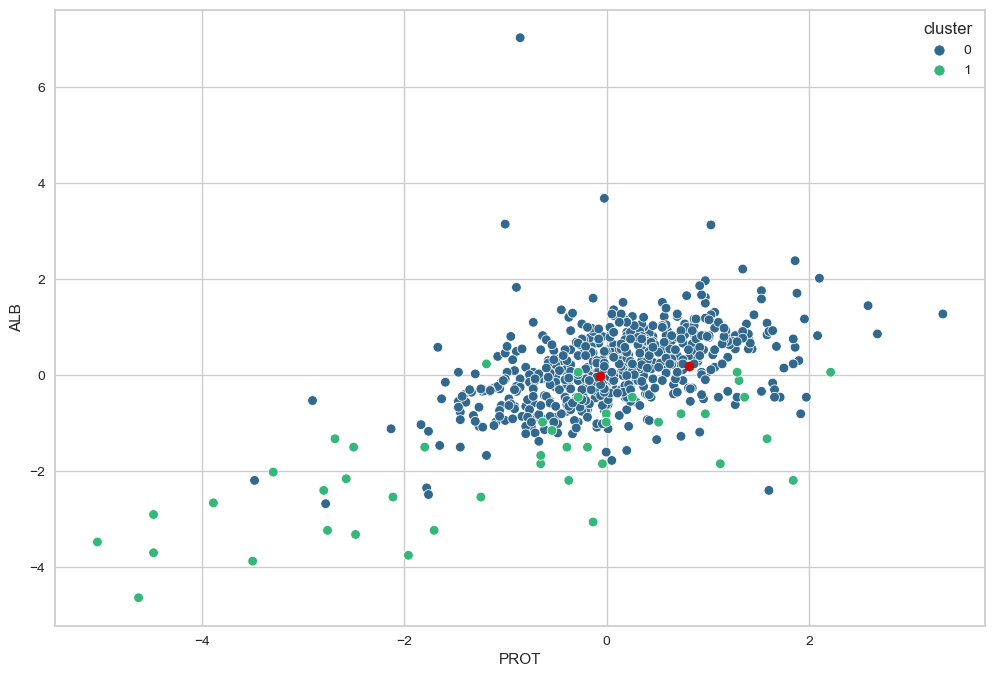

In [340]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=km_data_clus2, x='PROT', y='ALB', hue='cluster', palette='viridis')
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'ro', label='centroid')

**K-Means dengan 3 cluster**

In [341]:
km_data_clus3 = df.copy()

In [342]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=10000)
kmeans.fit(km_data_clus3)
km_data_clus3['cluster'] = kmeans.labels_
km_data_clus3

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,cluster
0,-1.533616,0.794544,-0.541571,-0.629271,-0.815632,-0.383693,-0.198236,-0.574734,-1.905006,0.497070,-0.502286,-0.559414,2
1,-1.533616,0.794544,-0.541571,0.056515,-0.410589,-0.305057,-0.381375,1.349161,-0.507483,-0.146590,-0.438203,0.826706,2
2,-1.533616,0.794544,0.913347,0.226035,0.305118,0.538767,-0.269457,0.291926,-0.151426,0.094783,-0.115957,1.344191,2
3,-1.533616,0.794544,0.272491,-0.648535,0.084901,-0.368571,0.381706,-0.393234,-0.560892,-0.025903,-0.104971,0.678853,2
4,-1.533616,0.794544,-0.420328,0.202918,0.163550,-0.302033,-0.091404,0.432588,-0.934751,-0.106361,-0.176378,-0.614859,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1.452371,-1.258584,-1.667400,13.398518,-0.886416,2.283879,1.963828,-1.191832,0.827730,-0.514683,11.193789,-0.651822,0
611,1.651437,-1.258584,-3.053036,1.308652,-1.004390,0.290761,0.437665,-3.020439,-2.091936,-0.367848,-0.066521,-0.134337,0
612,1.651437,-1.258584,-2.187014,0.711479,-0.980795,1.942115,1.862083,-2.965989,-1.548949,-0.293425,0.451636,1.843194,0
613,-0.140155,-1.258584,-1.494196,0.287204,0.415227,0.823066,0.437665,-2.103866,-1.041568,-0.589106,0.191642,-0.189782,1


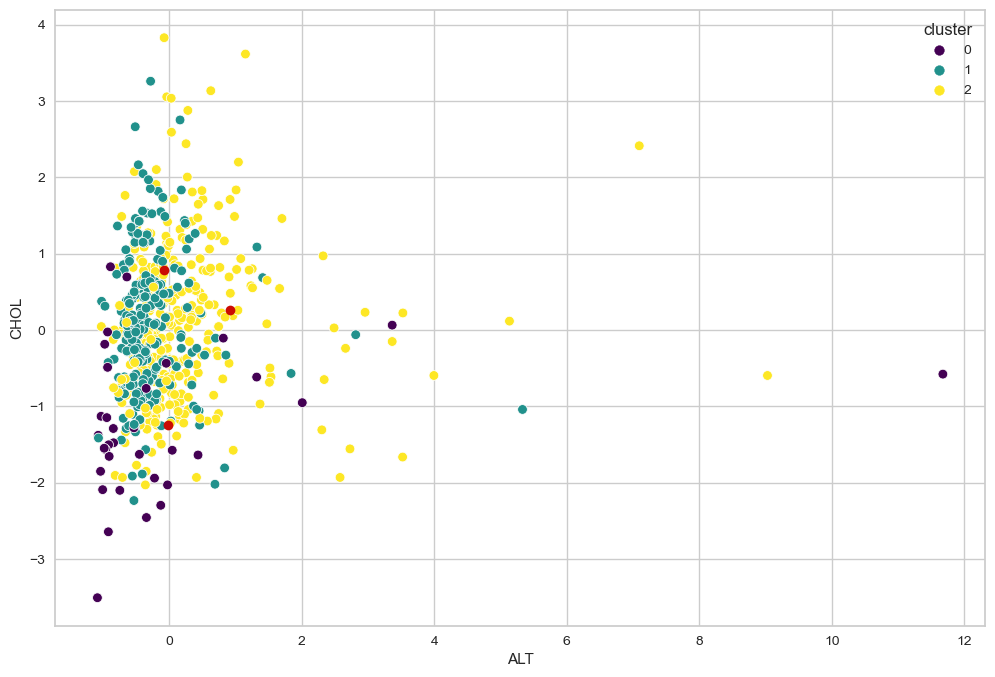

In [343]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=km_data_clus3, x='ALT', y='CHOL', hue='cluster', palette='viridis')
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'ro', label='centroid')

**K-Means dengan 4 cluster**

In [344]:
km_data_clus4 = df.copy()

kmeans = KMeans(n_clusters=4, random_state=42, max_iter=10000)
kmeans.fit(km_data_clus4)
km_data_clus4['cluster'] = kmeans.labels_
km_data_clus4

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,cluster
0,-1.533616,0.794544,-0.541571,-0.629271,-0.815632,-0.383693,-0.198236,-0.574734,-1.905006,0.497070,-0.502286,-0.559414,0
1,-1.533616,0.794544,-0.541571,0.056515,-0.410589,-0.305057,-0.381375,1.349161,-0.507483,-0.146590,-0.438203,0.826706,0
2,-1.533616,0.794544,0.913347,0.226035,0.305118,0.538767,-0.269457,0.291926,-0.151426,0.094783,-0.115957,1.344191,0
3,-1.533616,0.794544,0.272491,-0.648535,0.084901,-0.368571,0.381706,-0.393234,-0.560892,-0.025903,-0.104971,0.678853,0
4,-1.533616,0.794544,-0.420328,0.202918,0.163550,-0.302033,-0.091404,0.432588,-0.934751,-0.106361,-0.176378,-0.614859,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1.452371,-1.258584,-1.667400,13.398518,-0.886416,2.283879,1.963828,-1.191832,0.827730,-0.514683,11.193789,-0.651822,1
611,1.651437,-1.258584,-3.053036,1.308652,-1.004390,0.290761,0.437665,-3.020439,-2.091936,-0.367848,-0.066521,-0.134337,3
612,1.651437,-1.258584,-2.187014,0.711479,-0.980795,1.942115,1.862083,-2.965989,-1.548949,-0.293425,0.451636,1.843194,3
613,-0.140155,-1.258584,-1.494196,0.287204,0.415227,0.823066,0.437665,-2.103866,-1.041568,-0.589106,0.191642,-0.189782,2


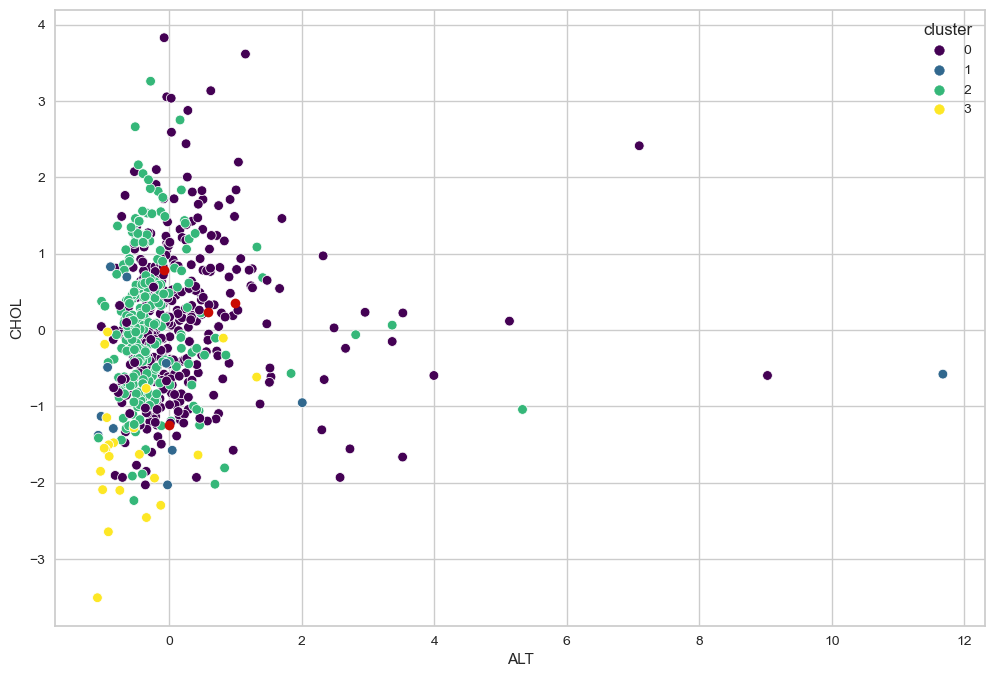

In [345]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=km_data_clus4, x='ALT', y='CHOL', hue='cluster', palette='viridis')
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'ro', label='centroid')

**K-Means dengan 5 cluster**

In [346]:
km_data_clus5 = df.copy()

kmeans = KMeans(n_clusters=5, random_state=42, max_iter=10000)
kmeans.fit(km_data_clus5)
km_data_clus5['cluster'] = kmeans.labels_
km_data_clus5

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,cluster
0,-1.533616,0.794544,-0.541571,-0.629271,-0.815632,-0.383693,-0.198236,-0.574734,-1.905006,0.497070,-0.502286,-0.559414,2
1,-1.533616,0.794544,-0.541571,0.056515,-0.410589,-0.305057,-0.381375,1.349161,-0.507483,-0.146590,-0.438203,0.826706,1
2,-1.533616,0.794544,0.913347,0.226035,0.305118,0.538767,-0.269457,0.291926,-0.151426,0.094783,-0.115957,1.344191,1
3,-1.533616,0.794544,0.272491,-0.648535,0.084901,-0.368571,0.381706,-0.393234,-0.560892,-0.025903,-0.104971,0.678853,1
4,-1.533616,0.794544,-0.420328,0.202918,0.163550,-0.302033,-0.091404,0.432588,-0.934751,-0.106361,-0.176378,-0.614859,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1.452371,-1.258584,-1.667400,13.398518,-0.886416,2.283879,1.963828,-1.191832,0.827730,-0.514683,11.193789,-0.651822,0
611,1.651437,-1.258584,-3.053036,1.308652,-1.004390,0.290761,0.437665,-3.020439,-2.091936,-0.367848,-0.066521,-0.134337,2
612,1.651437,-1.258584,-2.187014,0.711479,-0.980795,1.942115,1.862083,-2.965989,-1.548949,-0.293425,0.451636,1.843194,2
613,-0.140155,-1.258584,-1.494196,0.287204,0.415227,0.823066,0.437665,-2.103866,-1.041568,-0.589106,0.191642,-0.189782,2


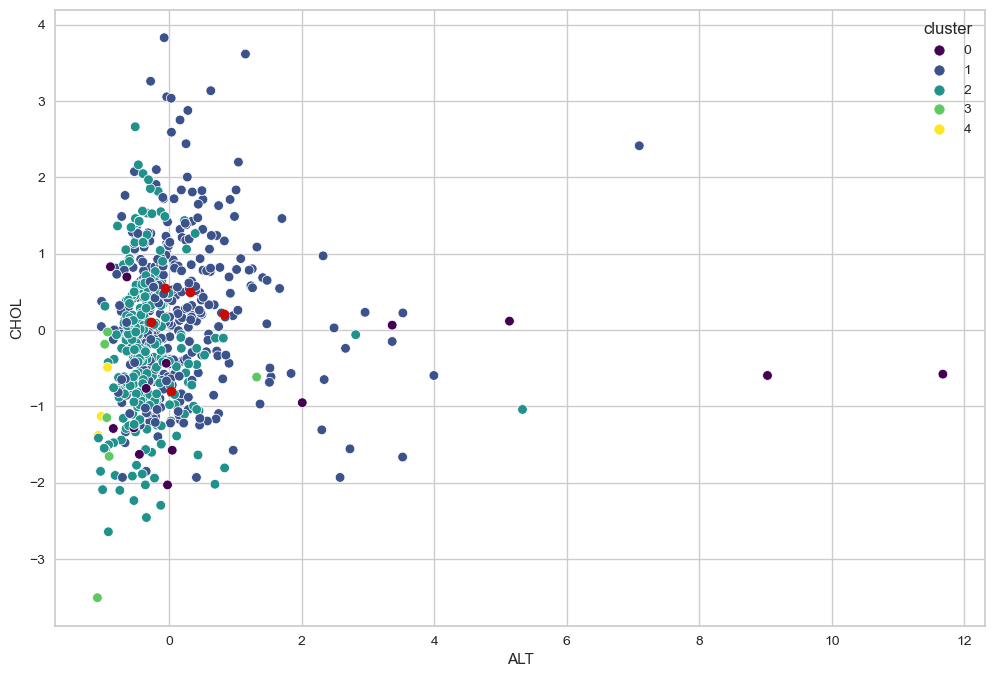

In [347]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=km_data_clus5, x='ALT', y='CHOL', hue='cluster', palette='viridis')
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'ro', label='centroid')

In [348]:
sil_data = df.copy()

In [349]:
scores = []

for n in range (2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42, max_iter=1000)
    labels = kmeans.fit_predict(sil_data)
    score = silhouette_score(sil_data, labels)
    scores.append(score)

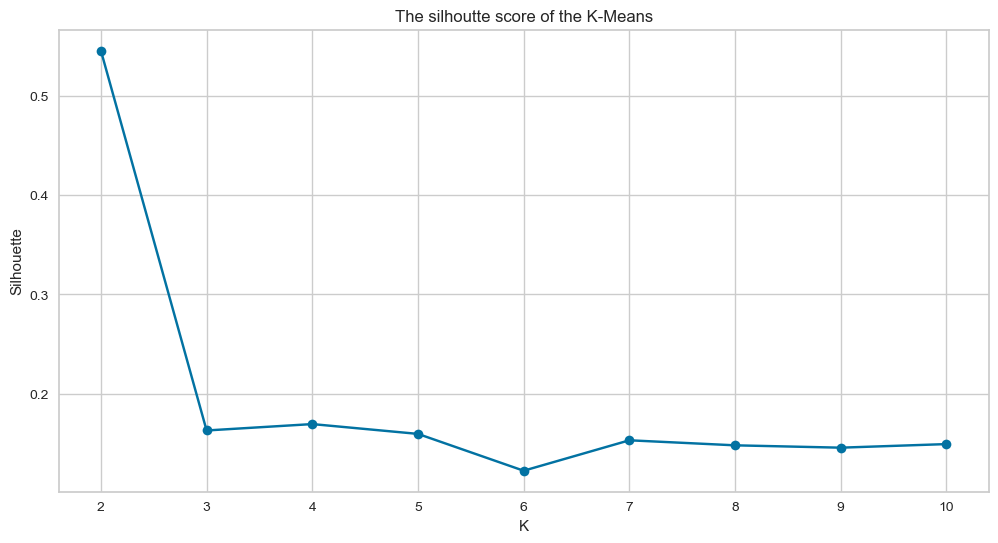

In [350]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), scores, '-o')
plt.title('The silhoutte score of the K-Means')
plt.xlabel('K')
plt.ylabel('Silhouette')
plt.grid(True)
plt.show()

In [351]:
for i, score in enumerate(scores):
    print(f'Score of cluster {i+2}: {score}')

Score of cluster 2: 0.5454093350180382
Score of cluster 3: 0.16311029731038684
Score of cluster 4: 0.16954724227560344
Score of cluster 5: 0.1596633642809675
Score of cluster 6: 0.12259126786822443
Score of cluster 7: 0.15322609158055717
Score of cluster 8: 0.14815842430459075
Score of cluster 9: 0.14579554049818547
Score of cluster 10: 0.1494044565856926


In [352]:
best_n_cluster = scores.index(max(scores))+2
print(f'Best n cluster: {best_n_cluster}')

Best n cluster: 2


In [353]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=10000)
kmeans.fit(sil_data)
sil_data['cluster'] = kmeans.labels_
sil_data

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,cluster
0,-1.533616,0.794544,-0.541571,-0.629271,-0.815632,-0.383693,-0.198236,-0.574734,-1.905006,0.497070,-0.502286,-0.559414,2
1,-1.533616,0.794544,-0.541571,0.056515,-0.410589,-0.305057,-0.381375,1.349161,-0.507483,-0.146590,-0.438203,0.826706,2
2,-1.533616,0.794544,0.913347,0.226035,0.305118,0.538767,-0.269457,0.291926,-0.151426,0.094783,-0.115957,1.344191,2
3,-1.533616,0.794544,0.272491,-0.648535,0.084901,-0.368571,0.381706,-0.393234,-0.560892,-0.025903,-0.104971,0.678853,2
4,-1.533616,0.794544,-0.420328,0.202918,0.163550,-0.302033,-0.091404,0.432588,-0.934751,-0.106361,-0.176378,-0.614859,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1.452371,-1.258584,-1.667400,13.398518,-0.886416,2.283879,1.963828,-1.191832,0.827730,-0.514683,11.193789,-0.651822,0
611,1.651437,-1.258584,-3.053036,1.308652,-1.004390,0.290761,0.437665,-3.020439,-2.091936,-0.367848,-0.066521,-0.134337,0
612,1.651437,-1.258584,-2.187014,0.711479,-0.980795,1.942115,1.862083,-2.965989,-1.548949,-0.293425,0.451636,1.843194,0
613,-0.140155,-1.258584,-1.494196,0.287204,0.415227,0.823066,0.437665,-2.103866,-1.041568,-0.589106,0.191642,-0.189782,1


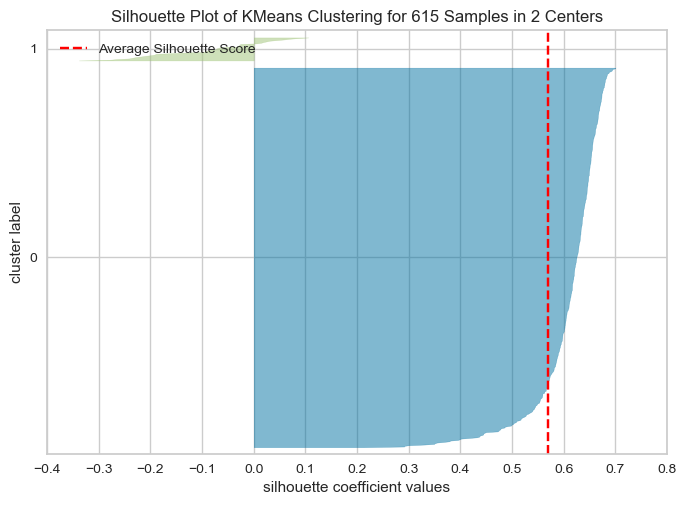

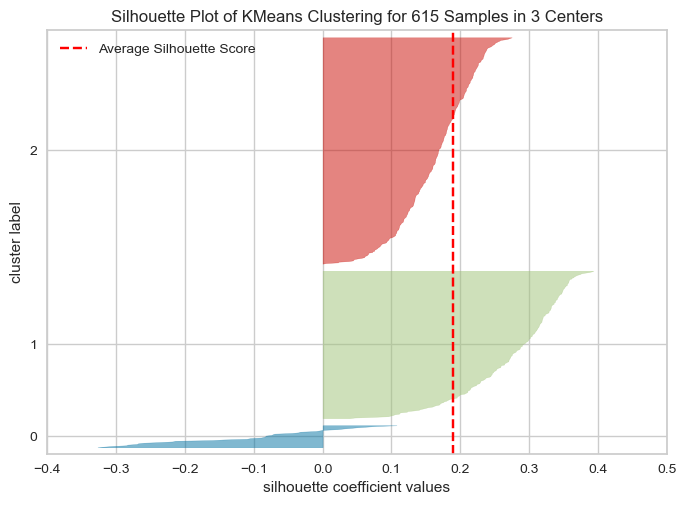

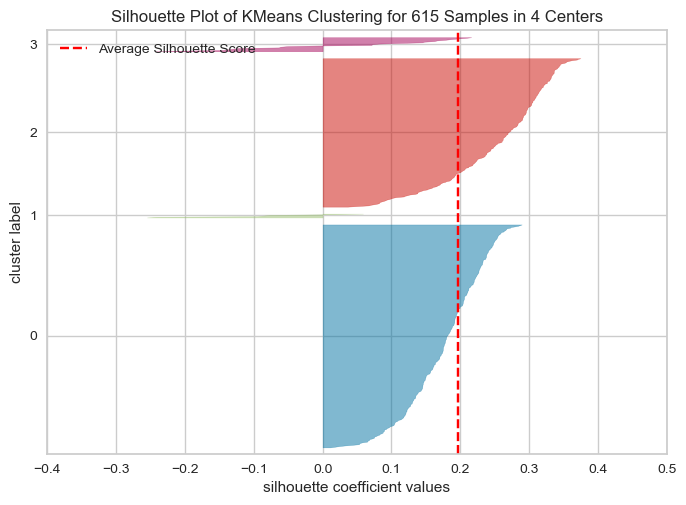

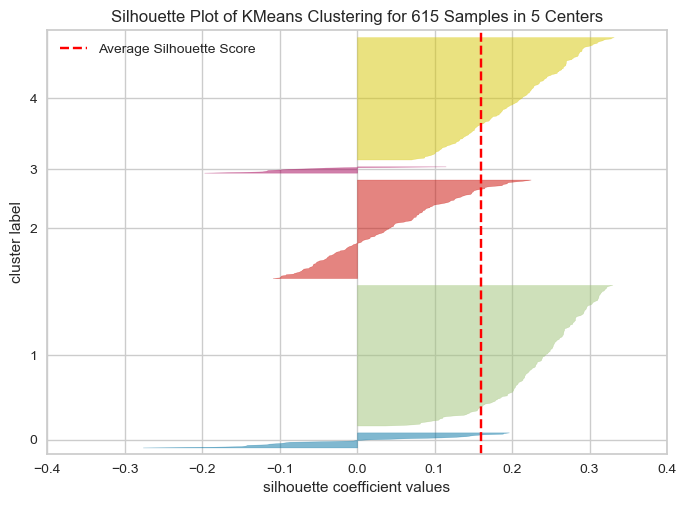

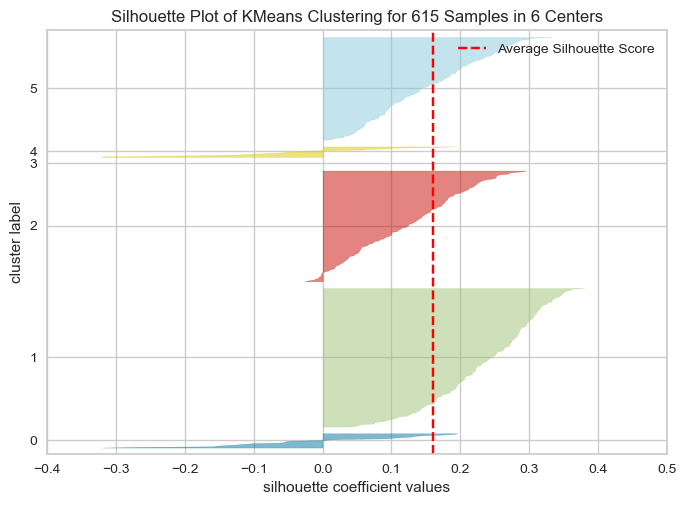

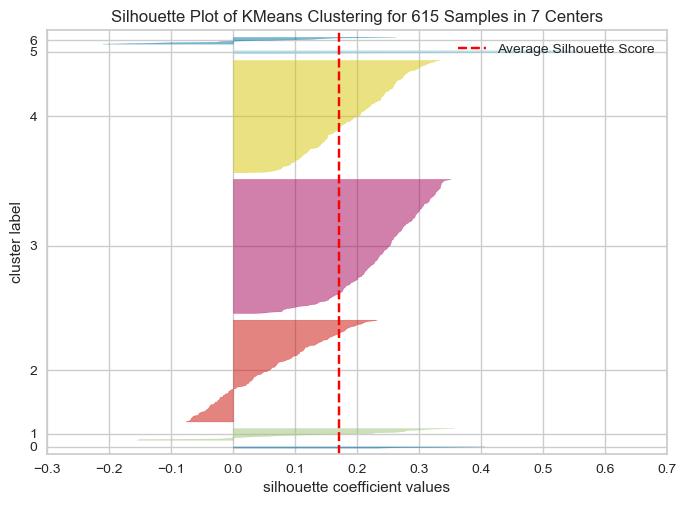

In [354]:
for i in range(2, len(scores) - 1):
    model = KMeans(n_clusters=i, random_state=42)
    visualizer =SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(sil_data)
    visualizer.show()

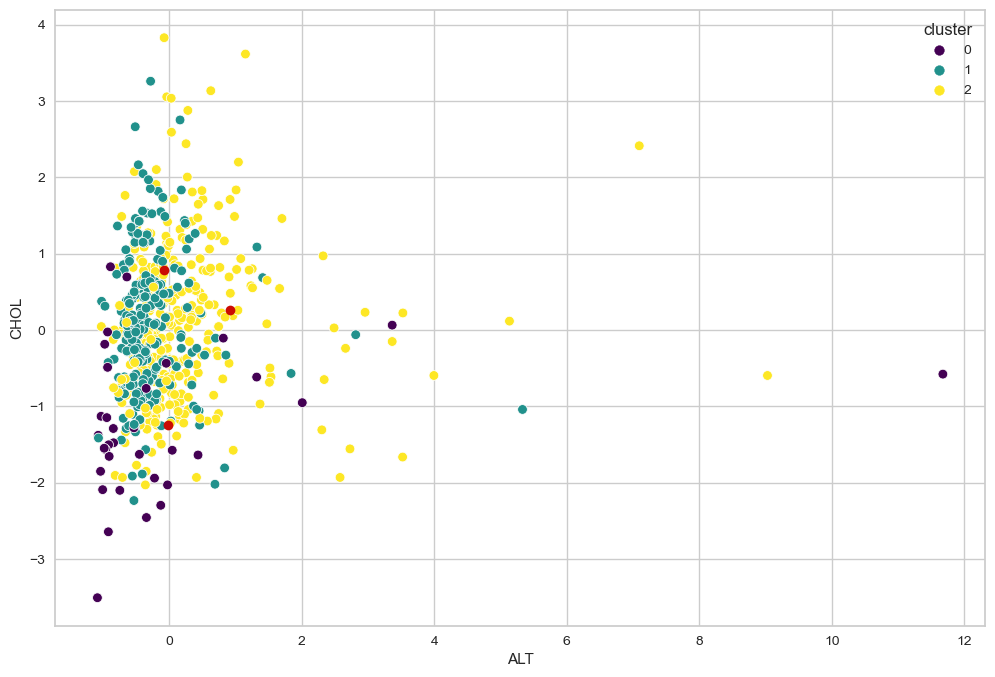

In [355]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=sil_data, x='ALT', y='CHOL', hue='cluster', palette='viridis')
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'ro', label='centroid')

In [356]:
print(Counter(sil_data['cluster']))

Counter({2: 351, 1: 229, 0: 35})


**Model dengan algoritma Hierarchical**

In [357]:
df_hr = df.copy()

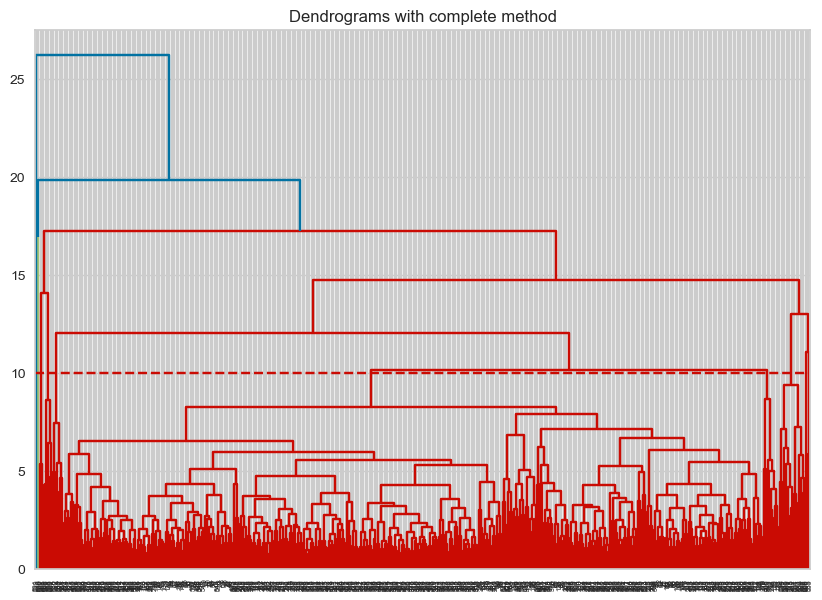

In [358]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms with complete method")
dend = sch.dendrogram(sch.linkage(df_hr, method='complete'))
plt.axhline(y=10, color='r', linestyle='--')
plt.show()

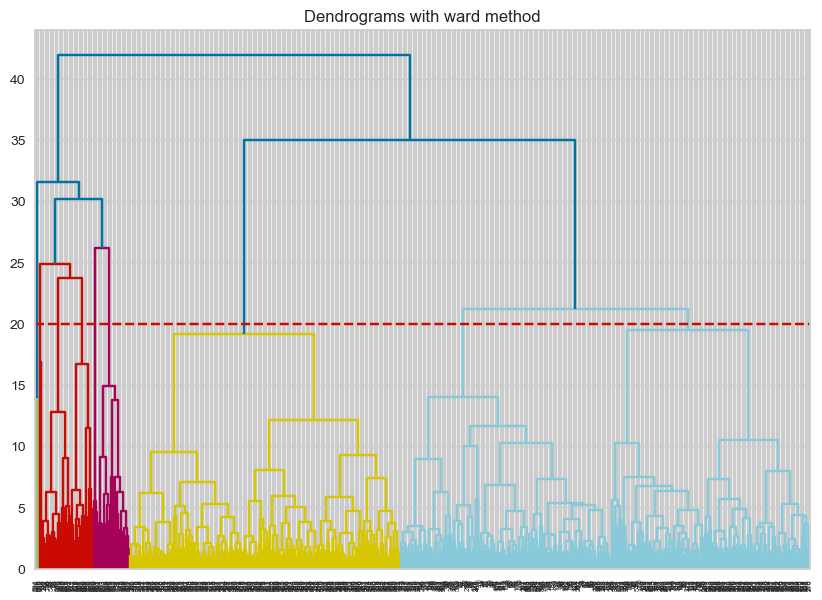

In [359]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms with ward method")
dend = sch.dendrogram(sch.linkage(df_hr, method='ward'))
plt.axhline(y=20, color='r', linestyle='--')
plt.show()

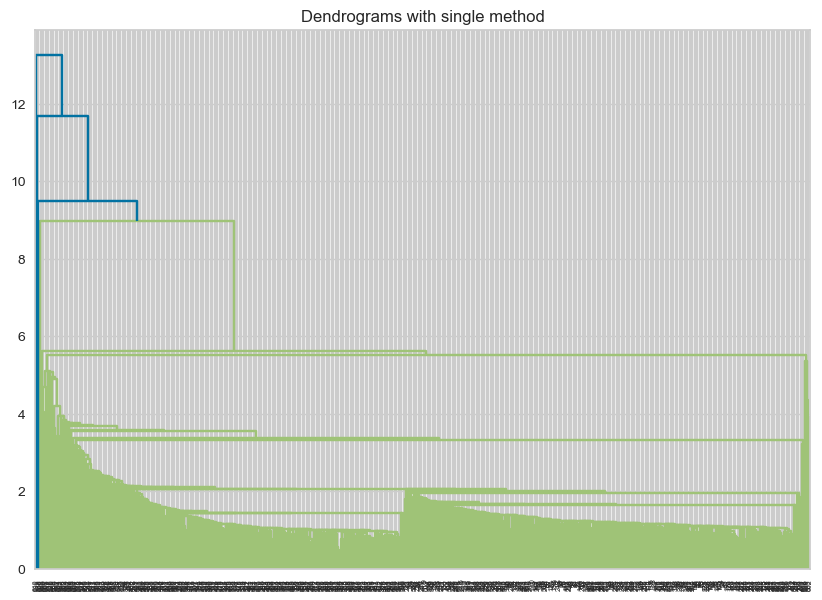

In [360]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms with single method")
dend = sch.dendrogram(sch.linkage(df_hr, method='single'))

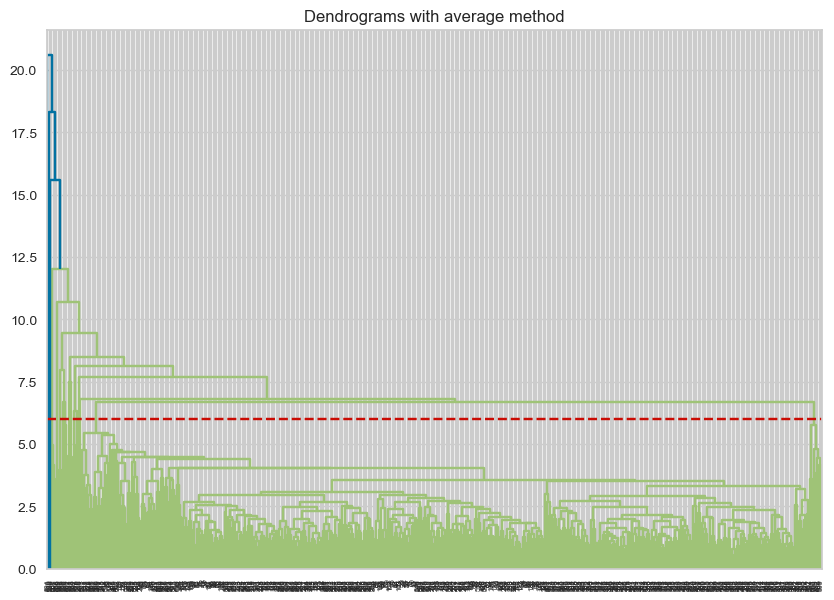

In [361]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms with average method")
dend = sch.dendrogram(sch.linkage(df_hr, method='average'))
plt.axhline(y=6, color='r', linestyle='--')
plt.show()

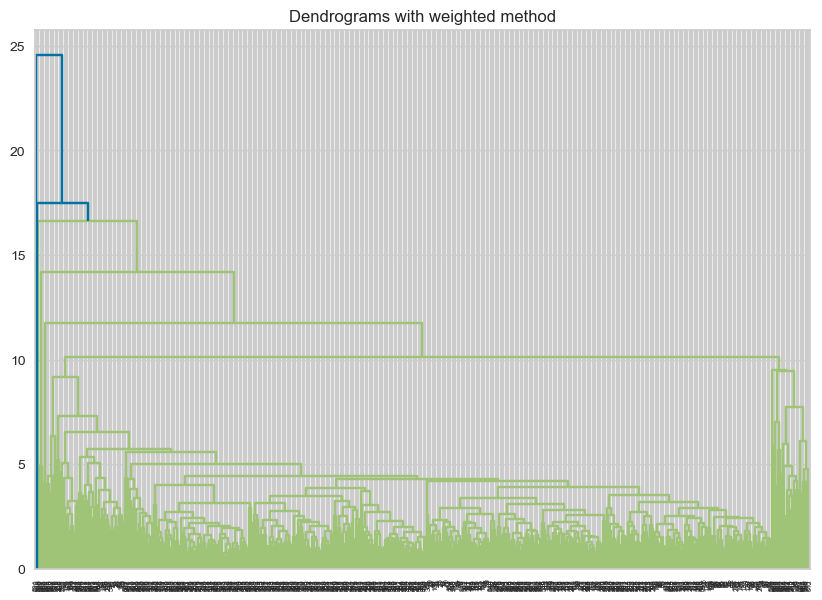

In [362]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms with weighted method")
dend = sch.dendrogram(sch.linkage(df_hr, method='weighted'))

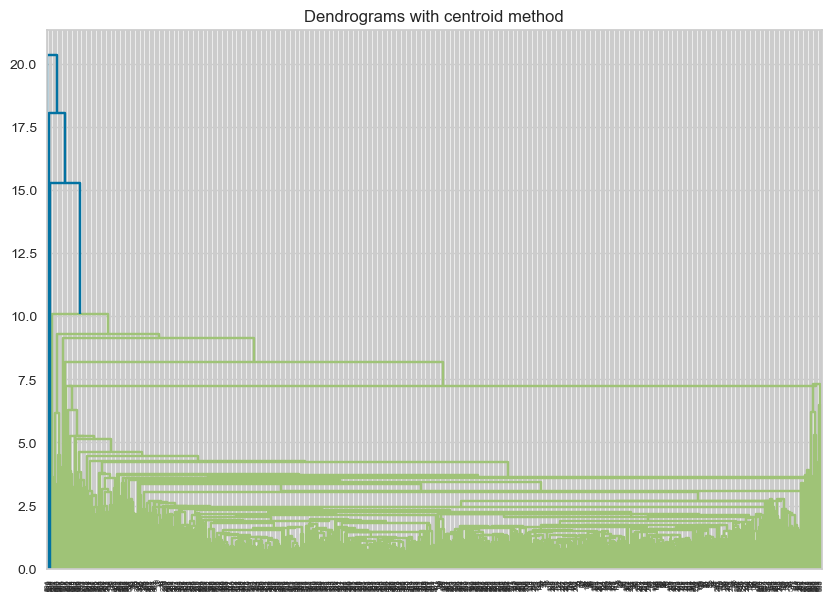

In [363]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms with centroid method")
dend = sch.dendrogram(sch.linkage(df_hr, method='centroid'))


In [364]:
scores = []

for i in range(2, 11):
    hr = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    labels = hr.fit_predict(df_hr)
    score = silhouette_score(df_hr, labels)
    scores.append(score)

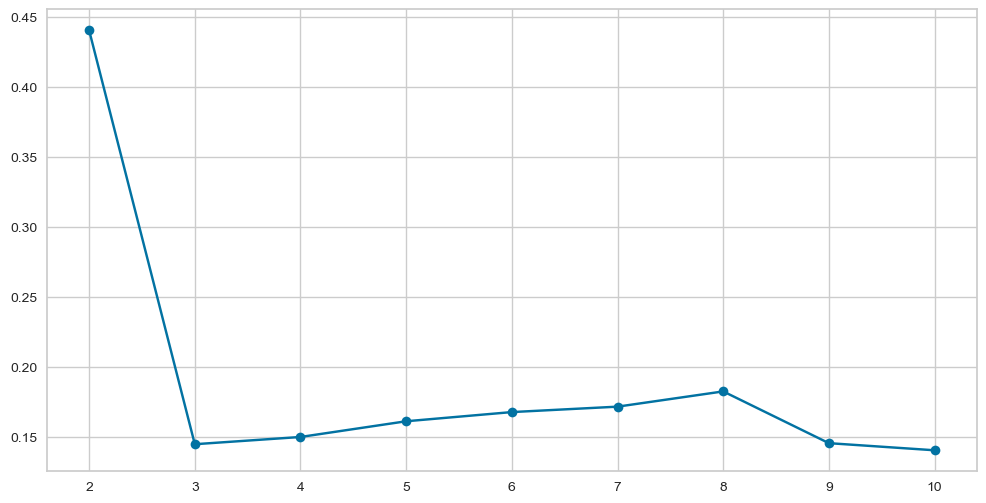

In [365]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), scores, '-o')

In [366]:
hr = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels = hr.fit_predict(df_hr)
df_hr['cluster'] = labels
df_hr

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,cluster
0,-1.533616,0.794544,-0.541571,-0.629271,-0.815632,-0.383693,-0.198236,-0.574734,-1.905006,0.497070,-0.502286,-0.559414,4
1,-1.533616,0.794544,-0.541571,0.056515,-0.410589,-0.305057,-0.381375,1.349161,-0.507483,-0.146590,-0.438203,0.826706,4
2,-1.533616,0.794544,0.913347,0.226035,0.305118,0.538767,-0.269457,0.291926,-0.151426,0.094783,-0.115957,1.344191,4
3,-1.533616,0.794544,0.272491,-0.648535,0.084901,-0.368571,0.381706,-0.393234,-0.560892,-0.025903,-0.104971,0.678853,4
4,-1.533616,0.794544,-0.420328,0.202918,0.163550,-0.302033,-0.091404,0.432588,-0.934751,-0.106361,-0.176378,-0.614859,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1.452371,-1.258584,-1.667400,13.398518,-0.886416,2.283879,1.963828,-1.191832,0.827730,-0.514683,11.193789,-0.651822,1
611,1.651437,-1.258584,-3.053036,1.308652,-1.004390,0.290761,0.437665,-3.020439,-2.091936,-0.367848,-0.066521,-0.134337,0
612,1.651437,-1.258584,-2.187014,0.711479,-0.980795,1.942115,1.862083,-2.965989,-1.548949,-0.293425,0.451636,1.843194,0
613,-0.140155,-1.258584,-1.494196,0.287204,0.415227,0.823066,0.437665,-2.103866,-1.041568,-0.589106,0.191642,-0.189782,0


In [367]:
print(Counter(df_hr['cluster']))

Counter({4: 325, 2: 215, 1: 43, 0: 29, 3: 3})


<Axes: xlabel='ALT', ylabel='CHOL'>

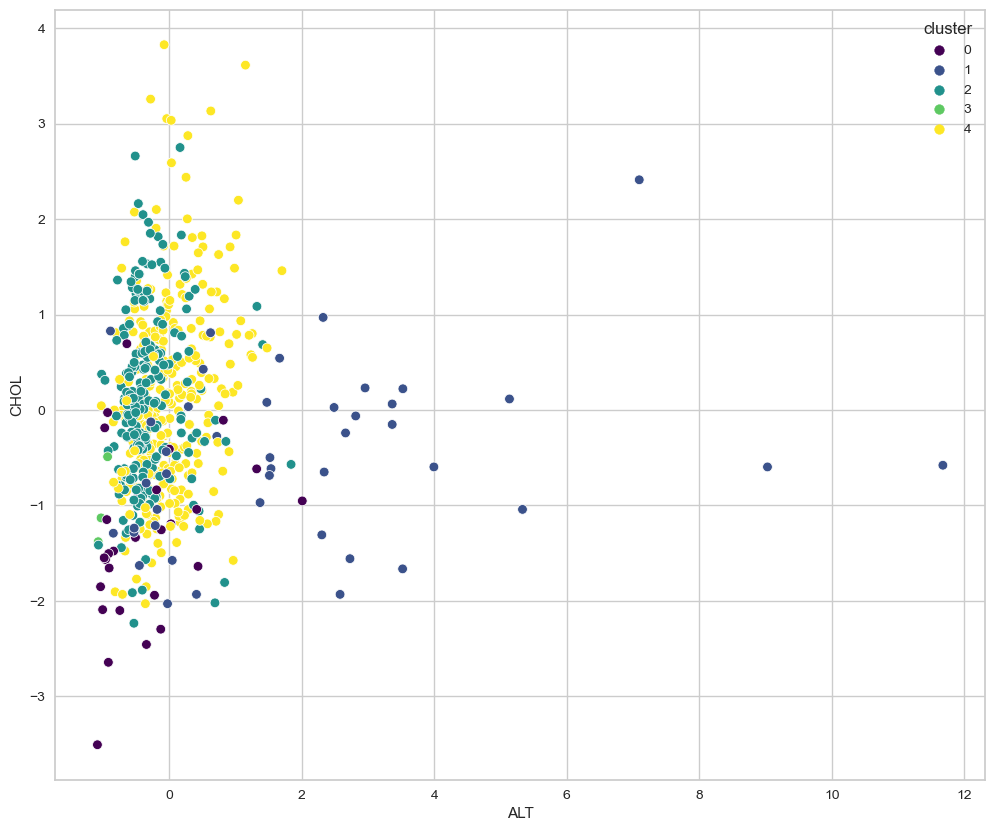

In [368]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df_hr, x='ALT', y='CHOL', hue='cluster', palette='viridis')

**Model dengan algoritma DBSCAN**

In [369]:
df_db = df.copy()

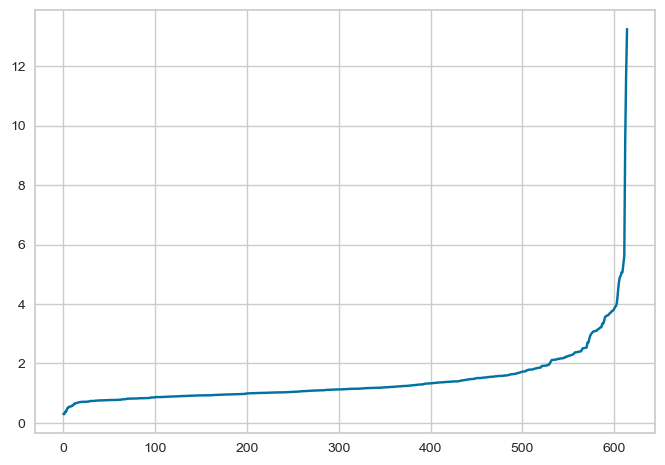

In [370]:
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(df_db)
distances, indices = nbrs.kneighbors(df_db)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [371]:
best_eps = 0
best_min_sample = 0
best_score = -1

for i in np.arange(0.1, 1.0, 0.1):
    for min_samples in range(2, 10):
        dbscan = DBSCAN(eps=i, min_samples=min_samples)
        labels = dbscan.fit_predict(df_db)
        
        if len(set(labels)) > 1:
            score = silhouette_score(df, labels)
            
            if score > best_score:
                best_score = score
                best_eps = i
                best_min_sample = min_samples

print(f'Best eps: {best_eps}, best min_Sample: {best_min_sample}')

Best eps: 0.30000000000000004, best min_Sample: 2


In [372]:
dbscan = DBSCAN(eps=0.3, min_samples=2)
labels = dbscan.fit_predict(df_db)
df_db['cluster'] = labels
df_db

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,cluster
0,-1.533616,0.794544,-0.541571,-0.629271,-0.815632,-0.383693,-0.198236,-0.574734,-1.905006,0.497070,-0.502286,-0.559414,-1
1,-1.533616,0.794544,-0.541571,0.056515,-0.410589,-0.305057,-0.381375,1.349161,-0.507483,-0.146590,-0.438203,0.826706,-1
2,-1.533616,0.794544,0.913347,0.226035,0.305118,0.538767,-0.269457,0.291926,-0.151426,0.094783,-0.115957,1.344191,-1
3,-1.533616,0.794544,0.272491,-0.648535,0.084901,-0.368571,0.381706,-0.393234,-0.560892,-0.025903,-0.104971,0.678853,-1
4,-1.533616,0.794544,-0.420328,0.202918,0.163550,-0.302033,-0.091404,0.432588,-0.934751,-0.106361,-0.176378,-0.614859,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1.452371,-1.258584,-1.667400,13.398518,-0.886416,2.283879,1.963828,-1.191832,0.827730,-0.514683,11.193789,-0.651822,-1
611,1.651437,-1.258584,-3.053036,1.308652,-1.004390,0.290761,0.437665,-3.020439,-2.091936,-0.367848,-0.066521,-0.134337,-1
612,1.651437,-1.258584,-2.187014,0.711479,-0.980795,1.942115,1.862083,-2.965989,-1.548949,-0.293425,0.451636,1.843194,-1
613,-0.140155,-1.258584,-1.494196,0.287204,0.415227,0.823066,0.437665,-2.103866,-1.041568,-0.589106,0.191642,-0.189782,-1


Text(0.5, 1.0, 'DBSCAN clustering')

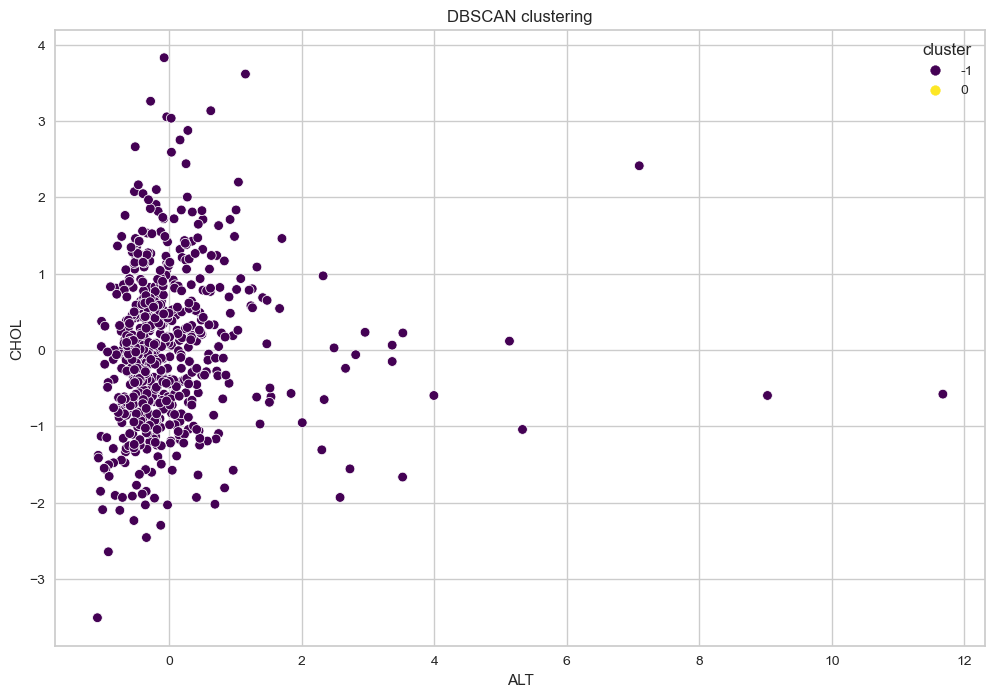

In [373]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_db, x='ALT', y='CHOL', hue='cluster', palette='viridis')
plt.title('DBSCAN clustering')

In [374]:
print(Counter(df_db['cluster']))

Counter({-1: 613, 0: 2})
